# Emulatte 1.0 introduction

## Sample Code

### Frequency-domain, Vertical Magnetic Dipole

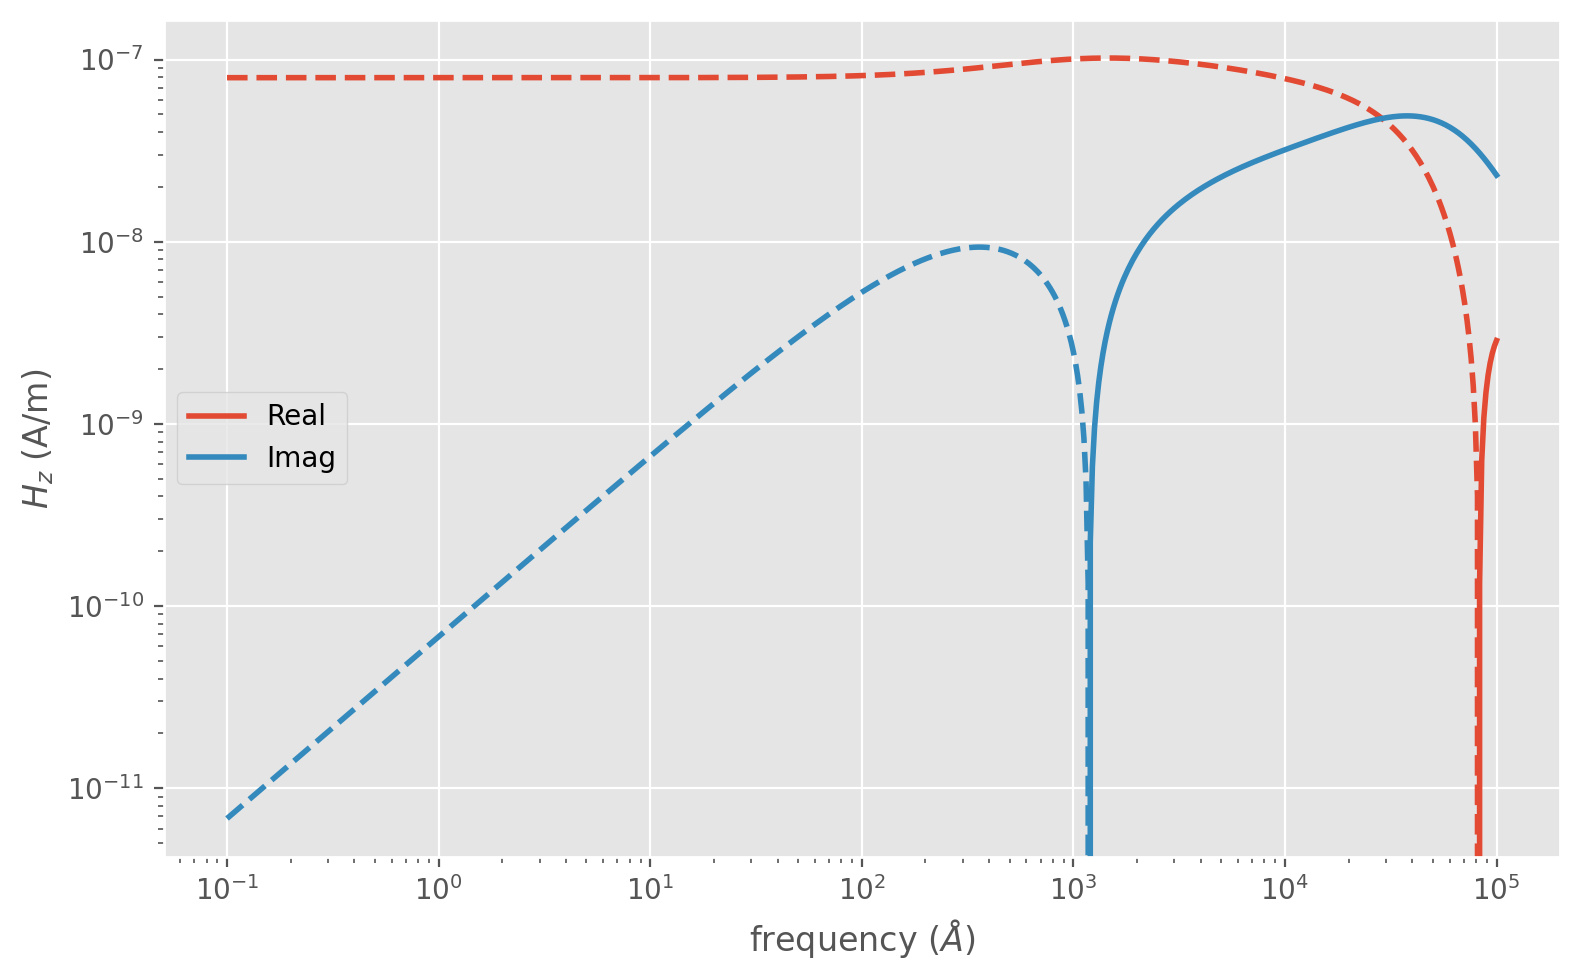

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')

import emulatte as emu
from emulatte.source import VMD

### parameter specification ###
# source coordinate [x,y,z]
tx = [0,0,0]
# receiver coordinate [x,y,z]
rx = [100,0,0]
# layer thickness
thicks = [30,60]
# resistivity of the layers
res = [100,10,100]
# frequency of transmittion
freq = np.logspace(-1, 5, 601)
# magnetic dipole moment
moment = 1

# create instances for model and source
model = emu.create_model(thicks)
vmd = VMD(moment)

# setting source & parameters
model.set_params(res)
model.set_source(vmd, tx)
model.set_filter(hankel_filter='key201')

# proceed the calculation & get answer
hz = model.field("H", "z", rx, freq)

# plot
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)
ax.plot(freq, hz.real, "C0-", label=r'Real', linewidth=2)
ax.plot(freq, -hz.real, "C0--", linewidth=2)
ax.plot(freq, hz.imag, "C1-", label=r'Imag', linewidth=2)
ax.plot(freq, -hz.imag, "C1--", linewidth=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'frequency ($\AA}$)')
ax.set_ylabel('$H_z$ (A/m)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


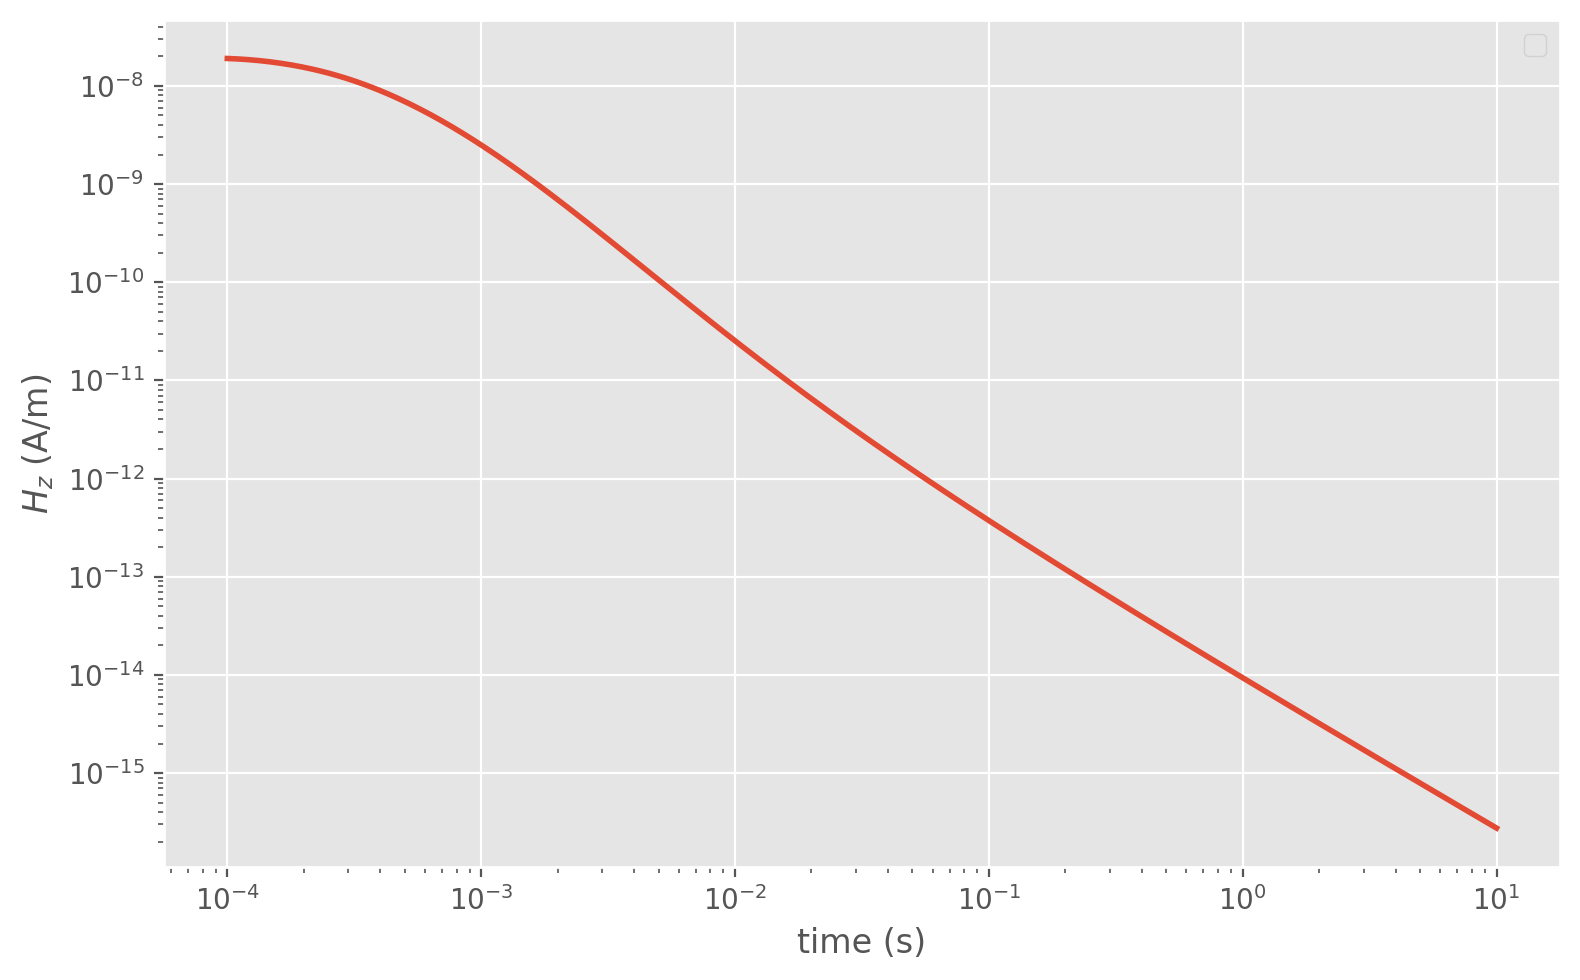

In [11]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')

import emulatte as emu
from emulatte.source import VMD

### parameter specification ###
# source coordinate [x,y,z]
tx = [0,0,0]
# receiver coordinate [x,y,z]
rx = [100,0,0]
# layer thickness
thicks = [30,60]
# resistivity of the layers
res = [100,10,100]
# frequency of transmittion
time = np.logspace(-4, 1, 601)
# magnetic dipole moment
moment = 1

# create instances for model and source
model = emu.create_model(thicks)
vmd = VMD(moment, ontime=-1)

# setting source & parameters
model.set_params(res)
model.set_source(vmd, tx)
model.set_filter(hankel_filter='key201')

# proceed the calculation & get answer
hz = model.field("H", "z", rx, time)

# plot
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)
ax.plot(time, hz.real, "C0-", linewidth=2)
ax.plot(time, -hz.real, "C0--", linewidth=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('time (s)')
ax.set_ylabel('$H_z$ (A/m)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-1.45640416e+04 -1.45565422e+04 -1.45483514e+04 -1.45394422e+04
 -1.45297878e+04 -1.45193610e+04 -1.45081352e+04 -1.44960903e+04
 -1.44832214e+04 -1.44695253e+04 -1.44549665e+04 -1.44394571e+04
 -1.44229044e+04 -1.44052171e+04 -1.43863051e+04 -1.43660795e+04
 -1.43444647e+04 -1.43213984e+04 -1.42968188e+04 -1.42706674e+04
 -1.42428878e+04 -1.42134174e+04 -1.41821361e+04 -1.41488930e+04
 -1.41135448e+04 -1.40760021e+04 -1.40361968e+04 -1.39940548e+04
 -1.39494717e+04 -1.39023342e+04 -1.38525330e+04 -1.37999734e+04
 -1.37445636e+04 -1.36862099e+04 -1.36248129e+04 -1.35602725e+04
 -1.34924847e+04 -1.34213388e+04 -1.33467236e+04 -1.32685386e+04
 -1.31866987e+04 -1.31011205e+04 -1.30117366e+04 -1.29184967e+04
 -1.28213504e+04 -1.27202327e+04 -1.26150661e+04 -1.25057758e+04
 -1.23923205e+04 -1.22746797e+04 -1.21528337e+04 -1.20267625e+04
 -1.18964461e+04 -1.17618678e+04 -1.16230285e+04 -1.14799353e+04
 -1.13326022e+04 -1.11810720e+04 -1.10253949e+04 -1.08656215e+04
 -1.07018042e+04 -1.05339

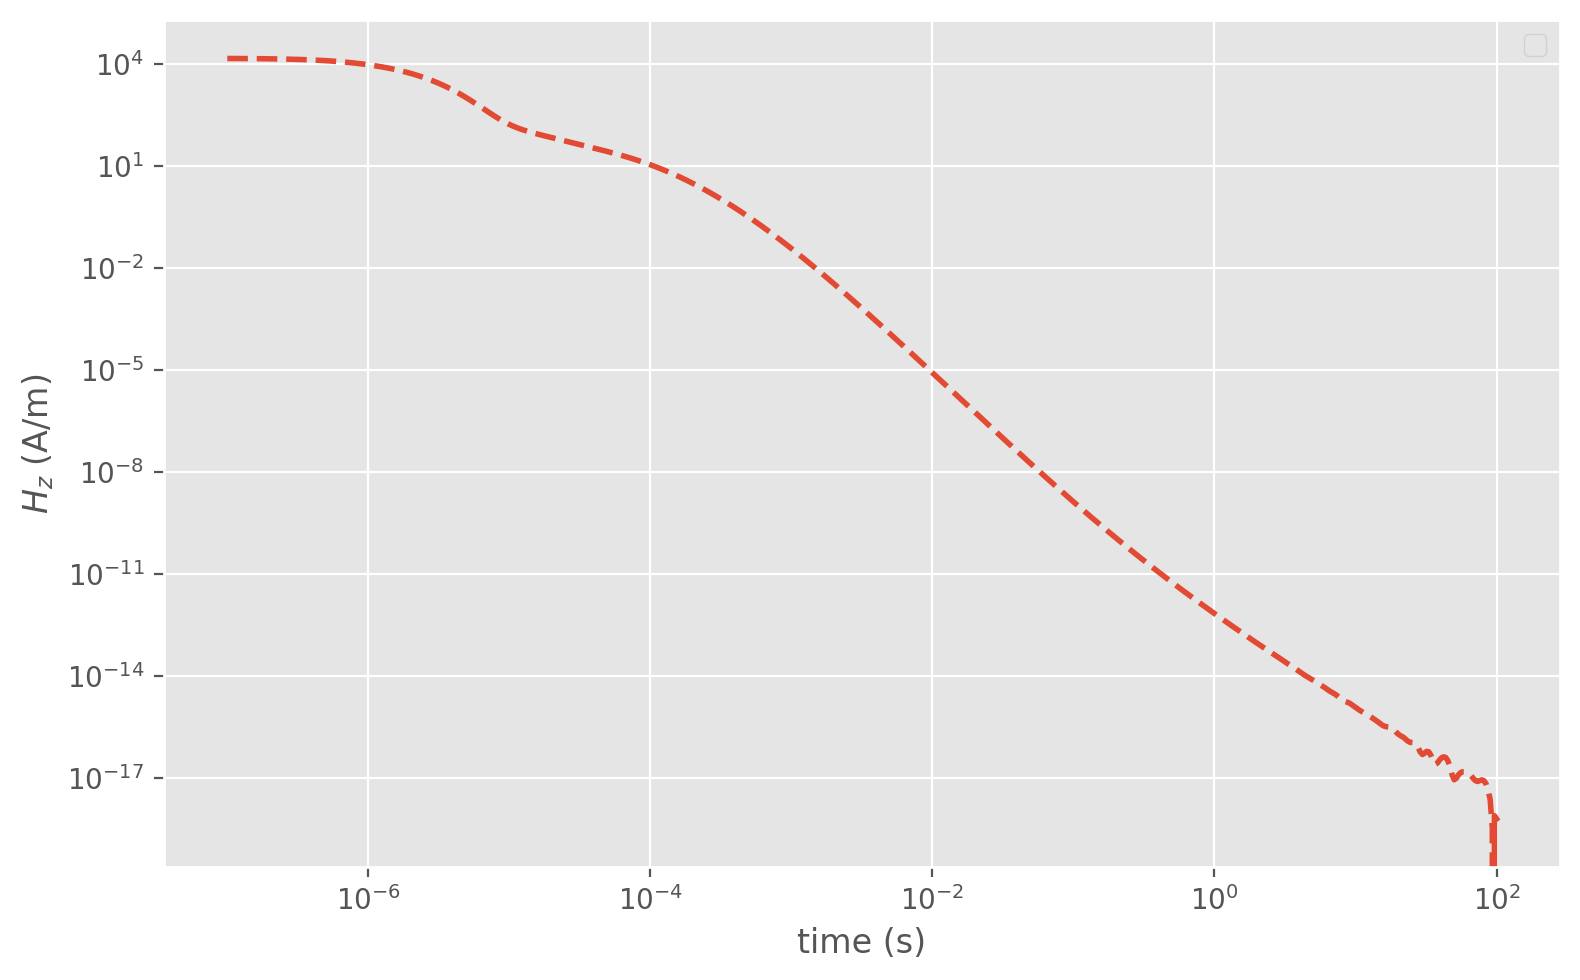

In [12]:
from emulatte.source import HCL

### parameter specification ###
# source coordinate [x,y,z]
tx = [0,0,0]
# receiver coordinate [x,y,z]
rx = [0,0,0]
# layer thickness
thicks = [10,10]
# resistivity of the layers
res = [100,1,1000]
# frequency of transmittion
time = np.logspace(-7, 2, 601)
# electrical current of loop
current = 1
# radius of loop
radius = 15

# create instances for model and source
model = emu.create_model(thicks)
hcl = HCL(current, radius, turns=1, ontime=-1)

# setting source & parameters
model.set_params(res)
model.set_source(hcl, tx)
model.set_filter(hankel_filter='key201')

# proceed the calculation & get answer
hx, hy, hz = model.field("H", "xyz", rx, time, time_derivative=True)

print(hz)

# plot
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)
ax.plot(time, hz, "C0-", linewidth=2)
ax.plot(time, -hz, "C0--", linewidth=2)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('time (s)')
ax.set_ylabel('$H_z$ (A/m)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

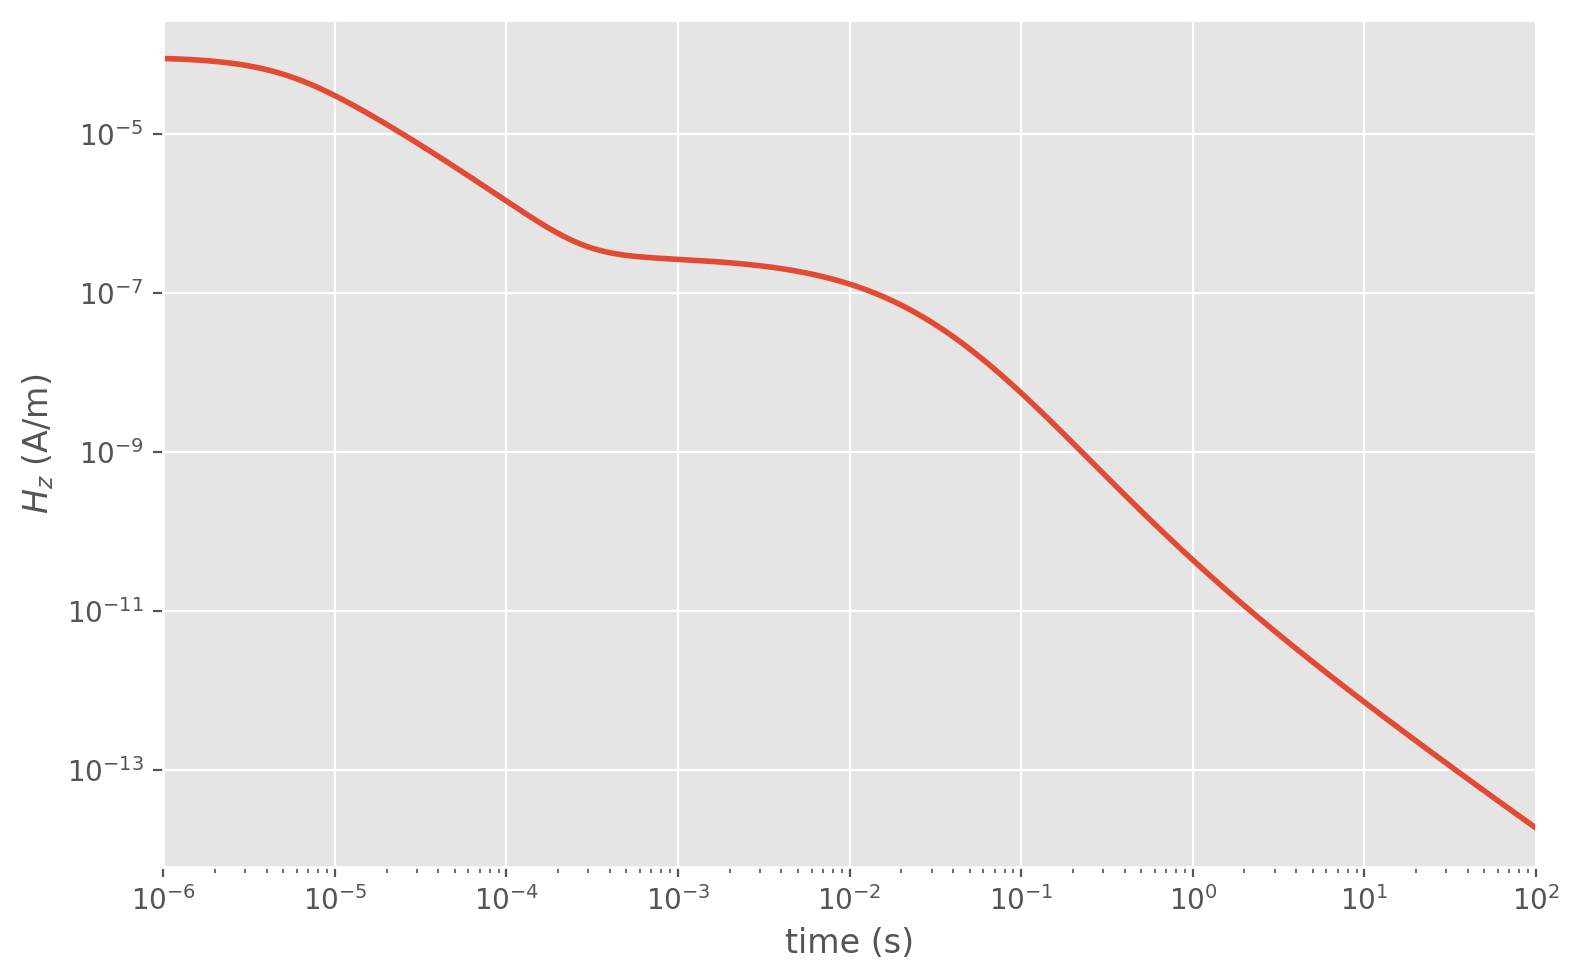

CPU times: user 983 ms, sys: 388 ms, total: 1.37 s
Wall time: 482 ms


In [13]:
%%time
from emulatte.source import HGW

### parameter specification ###
# source coordinate [x,y,z]
tx = [[-10,-10,0.01],[10,10,0.01]]
# receiver coordinate [x,y,z]
rx = [-100,100,0]
# layer thickness
thicks = [500,50]
# resistivity of the layers
res = [500,1,100]
# frequency of transmittion
time = np.logspace(-6, 2, 60001)
# electrical current of loop
current = 1

# create instances for model and source
model = emu.create_model(thicks, state='qs')
hgw = HGW(current, ontime=-1)

# setting source & parameters
model.set_params(res)
model.set_source(hgw, tx)
model.set_filter(hankel_filter='key201')

# proceed the calculation & get answer
hz = model.field("H", "z", rx, time)

# plot
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)
ax.plot(time, hz, "C0-", linewidth=2)
ax.plot(time, -hz, "C0--", linewidth=2)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('time (s)')
ax.set_ylabel('$H_z$ (A/m)')
ax.set_xlim(1e-6, 1e2)
ax.grid(True)
plt.tight_layout()
plt.show()

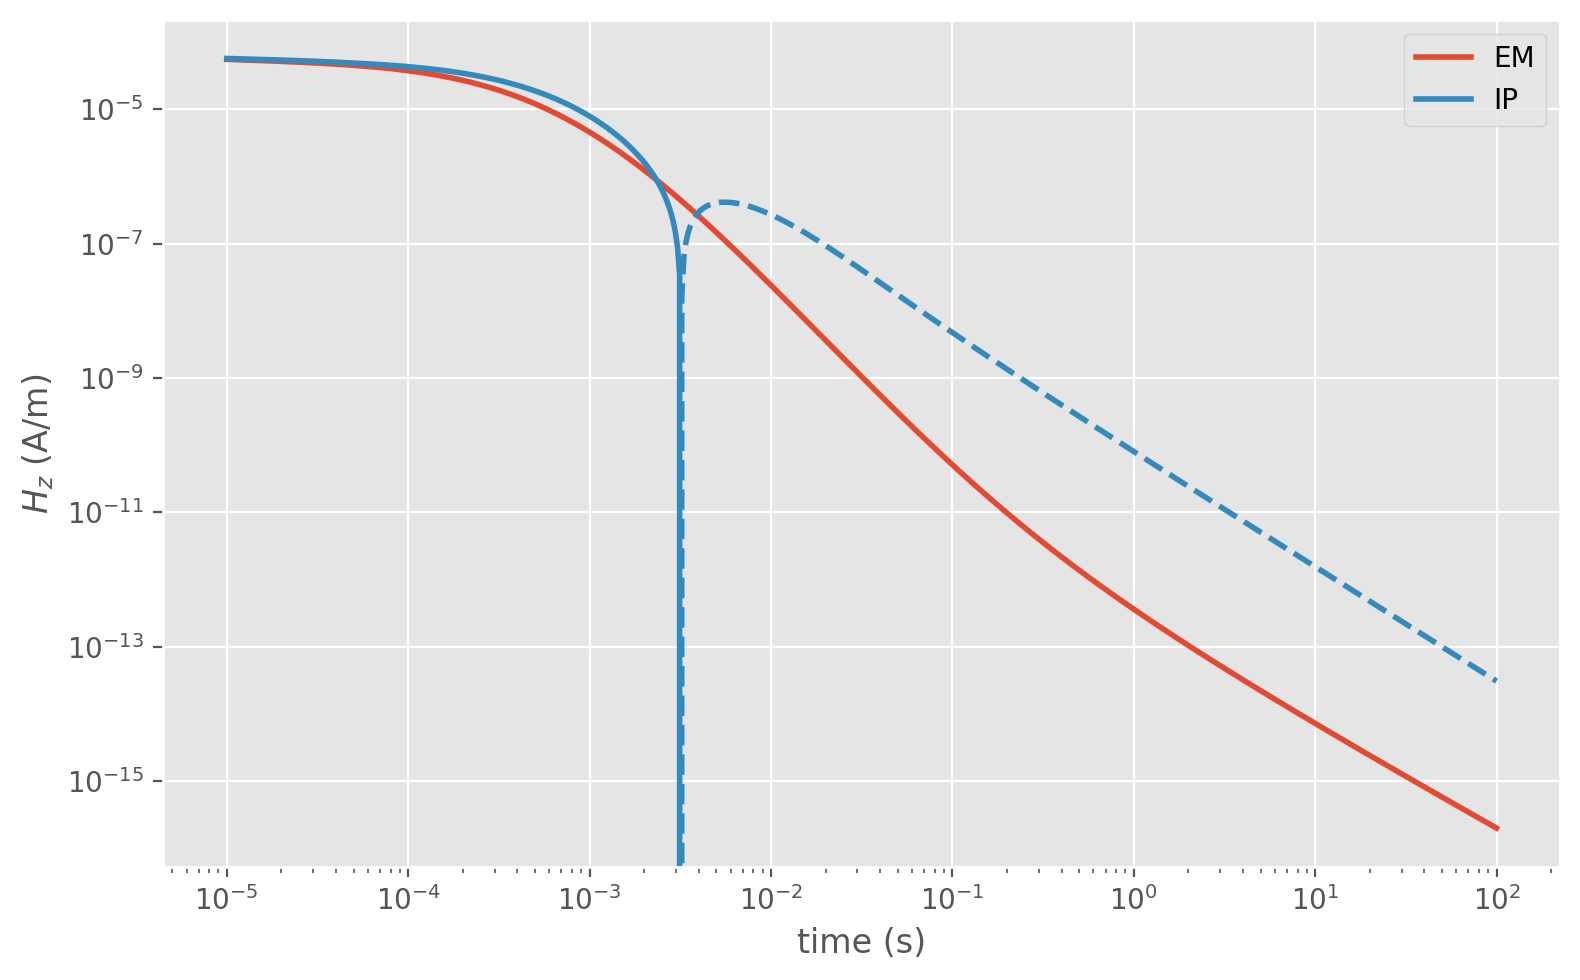

In [14]:
### parameter specification ###
# source coordinate [x,y,z]
tx = [0,0,-50]
# receiver coordinate [x,y,z]
rx = [0,0,-50]
# layer thickness
thicks = [10,10]
# cole-cole parameter of the layers
res = [100,1,1000]
m = [0, 0.4, 0]
t = [0, 1e-2, 0]
c = [0, 0.7, 0]
# frequency of transmittion
time = np.logspace(-5, 2, 601)
# electrical current of loop
current = 1
# radius of loop
radius = 15

# create instances for model and source
model = emu.create_model(thicks, state='ip')
hcl = HCL(current, radius, ontime=-1)

# setting source & parameters
model.set_params(res, m, t, c)
model.set_source(hcl, tx)
model.set_filter(hankel_filter='key201')

# proceed the calculation & get answer
hzip = model.field("H", "z", rx, time)


# create instances for model and source
model = emu.create_model(thicks)

# setting source & parameters
model.set_params(res)
model.set_source(hcl, tx)
model.set_filter(hankel_filter='key201')

# proceed the calculation & get answer
hz = model.field("H", "z", rx, time)

# plot
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)
ax.plot(time, hz, "C0-", linewidth=2, label='EM')
ax.plot(time, -hz, "C0--", linewidth=2)
ax.plot(time, hzip, "C1-", linewidth=2, label='IP')
ax.plot(time, -hzip, "C1--", linewidth=2)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('time (s)')
ax.set_ylabel('$H_z$ (A/m)')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

In [15]:
# create subsurface model
thicks = [100, 10]
sub_model = emu.create_model(thicks)

# set subsurface model parameter
res = [100, 1000, 100]
sub_model.set_params(res)

# create transmitter
current = 1
radius = 15
hcl = HCL(current, radius)

# set transmitter
tx = [0, 0, -10]
sub_model.set_source(hcl, tx)

# set filter
sub_model.set_filter('mizunaga90')

# ger response
rx = [0, 0, 0]
time = np.logspace(-6, 2, 601)
dhzdt = sub_model.field("H", "z", rx, time, time_derivative=True) #微分あり

In [16]:
dhzdt

array([4.95230778e-19+1.20644450e-07j, 5.26592045e-19+1.24405816e-07j,
       5.59939314e-19+1.28284450e-07j, 5.95398351e-19+1.32284009e-07j,
       6.33102887e-19+1.36408264e-07j, 6.73195123e-19+1.40661102e-07j,
       7.15826262e-19+1.45046532e-07j, 7.61157085e-19+1.49568688e-07j,
       8.09358554e-19+1.54231832e-07j, 8.60612456e-19+1.59040360e-07j,
       9.15112092e-19+1.63998805e-07j, 9.73063004e-19+1.69111840e-07j,
       1.03468375e-18+1.74384287e-07j, 1.10020672e-18+1.79821114e-07j,
       1.16987904e-18+1.85427446e-07j, 1.24396347e-18+1.91208568e-07j,
       1.32273941e-18+1.97169930e-07j, 1.40650397e-18+2.03317151e-07j,
       1.49557304e-18+2.09656026e-07j, 1.59028255e-18+2.16192529e-07j,
       1.69098969e-18+2.22932823e-07j, 1.79807427e-18+2.29883261e-07j,
       1.91194015e-18+2.37050395e-07j, 2.03301677e-18+2.44440980e-07j,
       2.16176075e-18+2.52061983e-07j, 2.29865765e-18+2.59920589e-07j,
       2.44422376e-18+2.68024205e-07j, 2.59900807e-18+2.76380469e-07j,
      

In [17]:
import sys

sys.path.append('../')

import emulatte.source as src

In [18]:
src.HGW

emulatte.source.line.HGW